In [1]:
import pandas as pd
import numpy as np
import pathlib 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
import warnings
import pandas as pd
from sklearn.metrics import roc_curve, auc
warnings.filterwarnings('ignore')

data_version = "TMD_cov"
output_version = "20240910"

outdir = "/media/hieunguyen/HNSD_mini/outdir"
PROJECT = "TMD450_TCGA_data_analysis"
thres_hypo = 0.3
thres_hyper = 0.6

input_cancer_class = "Liver"
path_to_main_output = os.path.join(outdir, PROJECT, output_version)
path_to_03_output = os.path.join(path_to_main_output, "03_output", input_cancer_class)
path_to_07_output = os.path.join(outdir, PROJECT, output_version, "07_output", input_cancer_class, "thres_hypo_{}_hyper_{}".format(thres_hypo, thres_hyper))

metadata = pd.read_excel("metadata_cfDNA_lowpdepth_TMD_bam_cov.xlsx")
metadata = metadata[metadata["Label"].isin([input_cancer_class, "Control"])]

all_files = [item for item in pathlib.Path(path_to_07_output).glob("*.candi_reads.csv")]
countdf = pd.read_csv(os.path.join(path_to_07_output, "all_count.csv"), index_col = [0])

all_samples = []
all_mean_candi_reads = []
for file in all_files:
    tmpdf = pd.read_csv(file)
    mean_candi_reads = tmpdf.candi_reads.mean()
    all_samples.append(file.name.split(".")[0])
    all_mean_candi_reads.append(mean_candi_reads)

candidf = pd.DataFrame({"SampleID": all_samples, "num_candi_reads": all_mean_candi_reads})
candidf = candidf.merge(countdf, right_on = "SampleID", left_on = "SampleID")
candidf["ratio_raw"] = candidf["num_candi_reads"] / candidf["raw_count"]
candidf["ratio_in_reads"] = candidf["num_candi_reads"] / candidf["in_read_count"]
candidf = candidf.merge(metadata[["SampleID", "Label", "Set"]], right_on = "SampleID", left_on = "SampleID")

In [ ]:
!pip install -U scikit-learn

In [6]:
# Calculate the ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(candidf['Label'].apply(lambda x: 1 if x == input_cancer_class else 0), candidf['ratio_raw'])

# Calculate the AUC
roc_auc = auc(fpr, tpr)

print(f"AUC: {roc_auc}")

ModuleNotFoundError: No module named 'sklearn'

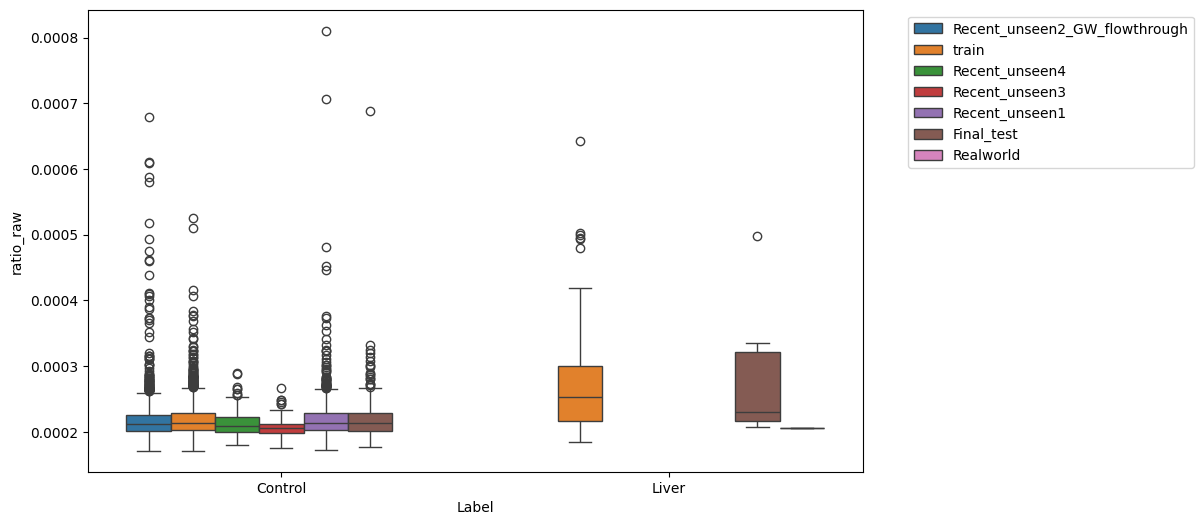

In [2]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=candidf, x="Label", y="ratio_raw", hue="Set")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

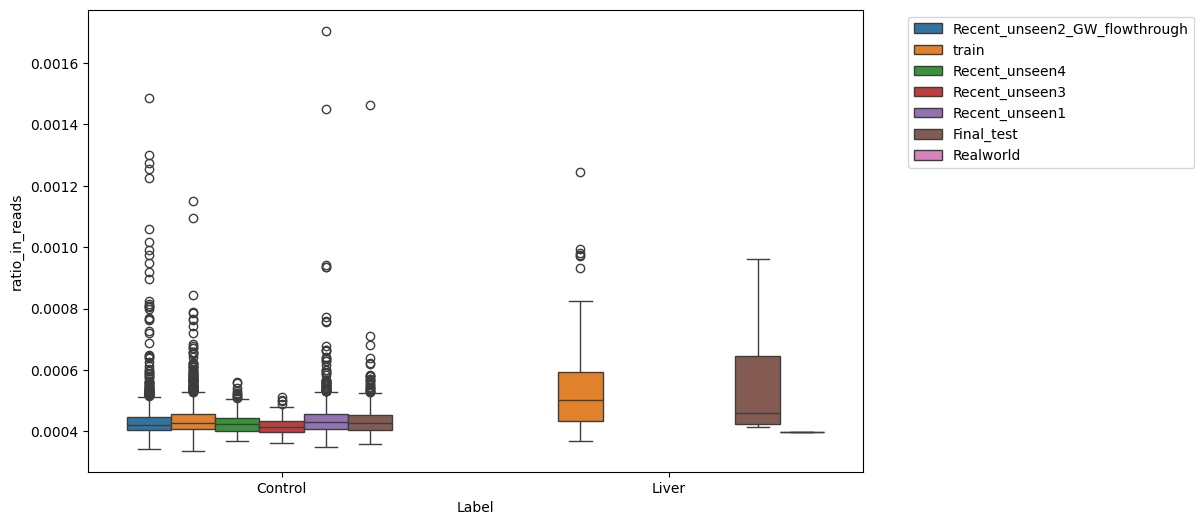

In [3]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=candidf, x="Label", y="ratio_in_reads", hue="Set")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()